In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [ ]:
!mkdir -p ~/.kaggle
!cp Kaggle-5.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d danrasband/asl-alphabet-test

cp: cannot stat 'Kaggle-5.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/danrasband/asl-alphabet-test
License(s): CC0-1.0
 91% 22.0M/24.3M [00:00<00:00, 39.3MB/s]
100% 24.3M/24.3M [00:00<00:00, 37.8MB/s]


In [ ]:
!unzip asl-alphabet-test.zip

Archive:  asl-alphabet-test.zip
  inflating: A/A0001_test.jpg        
  inflating: A/A0002_test.jpg        
  inflating: A/A0003_test.jpg        
  inflating: A/A0004_test.jpg        
  inflating: A/A0005_test.jpg        
  inflating: A/A0006_test.jpg        
  inflating: A/A0007_test.jpg        
  inflating: A/A0008_test.jpg        
  inflating: A/A0009_test.jpg        
  inflating: A/A0010_test.jpg        
  inflating: A/A0011_test.jpg        
  inflating: A/A0012_test.jpg        
  inflating: A/A0013_test.jpg        
  inflating: A/A0014_test.jpg        
  inflating: A/A0015_test.jpg        
  inflating: A/A0016_test.jpg        
  inflating: A/A0017_test.jpg        
  inflating: A/A0018_test.jpg        
  inflating: A/A0019_test.jpg        
  inflating: A/A0020_test.jpg        
  inflating: A/A0021_test.jpg        
  inflating: A/A0022_test.jpg        
  inflating: A/A0023_test.jpg        
  inflating: A/A0024_test.jpg        
  inflating: A/A0025_test.jpg        
  inflating: A/A00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 0.0451 - loss: 3.3920 - val_accuracy: 0.0230 - val_loss: 3.3690
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.0307 - loss: 3.3596 - val_accuracy: 0.0230 - val_loss: 3.3548
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.0539 - loss: 3.3270 - val_accuracy: 0.0115 - val_loss: 3.3742
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.0680 - loss: 3.3075 - val_accuracy: 0.0115 - val_loss: 3.4091
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - accuracy: 0.0579 - loss: 3.2697 - val_accuracy: 0.0287 - val_loss: 3.5554
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.0609 - loss: 3.2114 - val_accuracy: 0.0345 - val_loss: 3.2870
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.0839 - loss: 3.2397 - val_accuracy: 0.0632 - val_loss: 3.3511
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.1186 - loss: 3.1053 - val_accuracy: 0.07

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4352 - loss: 1.9174
Test accuracy: 0.4483
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


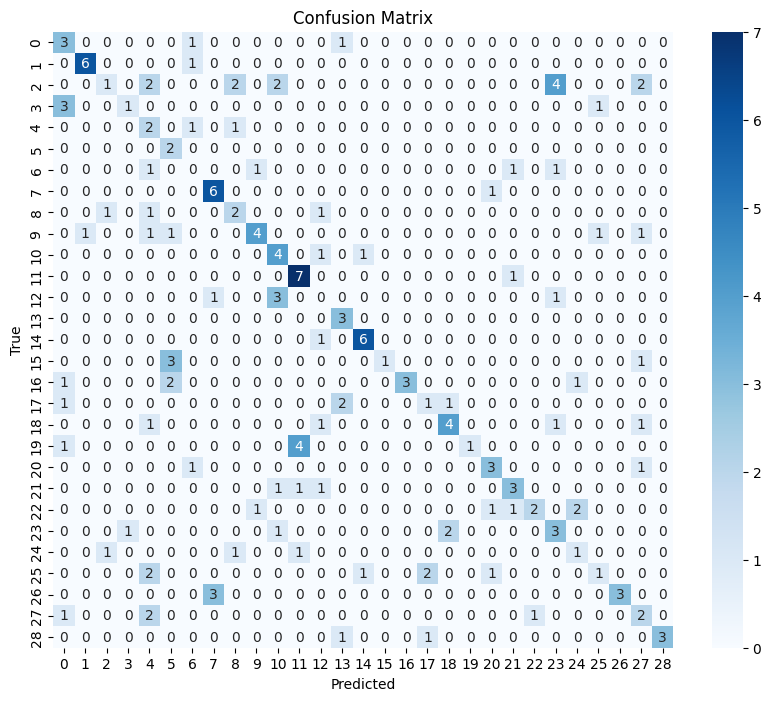

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: 10


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import mediapipe as mp
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
dataset_path = 'asl-alphabet-test'  # Change to your dataset path

# Initialize data and labels lists
data = []
labels = []

# Iterate over each folder in the dataset
for label, folder in enumerate(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image and resize it to 64x64
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))
        # Append the image and corresponding label
        data.append(image)
        labels.append(label)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize image data (pixel values between 0 and 1)
data = data / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(dataset_path))  # Number of classes (letters)
labels = to_categorical(labels, num_classes=num_classes)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 3: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 4: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model with data augmentation
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,  # Increase the number of epochs
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Step 6: Save the model (optional)
model.save('asl_gesture_model.h5')

# Step 7: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 8: Confusion matrix visualization
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Function to take a photo using the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image using the webcam
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image for prediction
    captured_image = cv2.imread(filename)
    captured_image = cv2.resize(captured_image, (64, 64))
    captured_image = captured_image / 255.0  # Normalize
    captured_image = np.expand_dims(captured_image, axis=0)  # Add batch dimension

    # Predict gesture
    prediction = model.predict(captured_image)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = predicted_class[0]

    # Display predicted label
    print(f'Predicted label: {predicted_label}')

except Exception as err:
    print(str(err))


In [ ]:
!pip install matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming take_photo is defined elsewhere
filename = take_photo()
print('Saved to {}'.format(filename))

# Load and preprocess the captured image
captured_image = cv2.imread(filename)
captured_image = cv2.resize(captured_image, (64, 64))

# Normalize image data (keep as float)
captured_image = captured_image.astype('float32') / 255.0
captured_image = np.expand_dims(captured_image, axis=0)

# Display the captured image (convert back to uint8)
display_image = (captured_image[0] * 255).astype('uint8')  # Convert back to uint8
plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

# Predict gesture
prediction = model.predict(captured_image)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = predicted_class[0]

label_to_letter = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}


# Get the corresponding letter name from the predicted label
predicted_letter = label_to_letter.get(predicted_label, "Unknown")

# Display predicted letter
print(f'Predicted letter: {predicted_letter}')


NameError: name 'take_photo' is not defined